In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import torch.utils.data
from torch.autograd import Variable
from tqdm import tqdm
import matplotlib.pyplot as plt
import joblib

In [2]:
from isaac.utils import plot_confusion_matrix
from isaac.dataset import read_dataset, prepare_dataset, normalise
from isaac.training import evaluate
from isaac.models import RNNModel, ComplexRNNModel
from isaac.constants import BASIC_TRAINING_COLS, FORCE_CLASS_COLS, MASS_CLASS_COLS

# MASS TESTING

# Load passive dataset scaler

In [3]:
scaler = joblib.load("scalers/passive_mass_scaler.sk")

# Load yoked dataset

In [4]:
yoked_trials = read_dataset("data/mass_trials_exp2.h5")

In [5]:
X = []
Y = []

for trial in yoked_trials:
    X.append(np.array(trial[BASIC_TRAINING_COLS]).astype(np.float32))
    Y.append(np.argmax(np.array(trial[MASS_CLASS_COLS].iloc[0])))

X = np.array(X)
Y = np.array(Y)

### Normalising yoked dataset

In [6]:
X_scaled = normalise(X, scaler, fit_scaler=False)

### Creating tensor dataset

In [7]:
X = torch.from_numpy(X_scaled)
Y = torch.from_numpy(Y).type(torch.LongTensor)
yoked_dataset = torch.utils.data.TensorDataset(X, Y)
yoked_loader = torch.utils.data.DataLoader(yoked_dataset, batch_size=128, shuffle=False)

In [8]:
Y = []
for x,y in yoked_loader:
    
    Y.extend(list(y))

counts = np.unique(Y, return_counts=True)[1]
print("Majority class: ", np.max(counts) / np.sum(counts))

Majority class:  0.35


In [9]:
counts

array([140, 120, 140])

# Load pre-trained model

In [10]:
model = ComplexRNNModel(16, 20, 3, 3)
model.load_state_dict(torch.load("models/passive_mass_model.pt"))
model.eval()

ComplexRNNModel(
  (lstm): GRU(16, 20, num_layers=3, batch_first=True)
  (fc): Linear(in_features=20, out_features=3, bias=True)
)

In [11]:
accuracy, predicted = evaluate(model, yoked_loader, return_predicted=True)

In [12]:
print(accuracy)

34.25


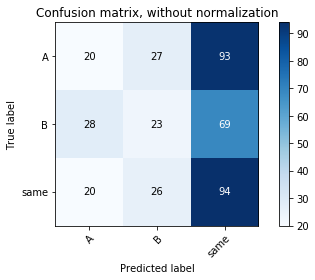

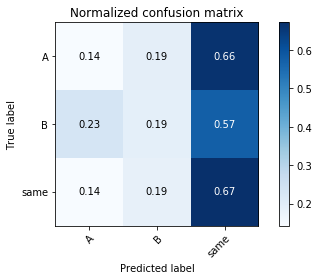

In [13]:
plot_confusion_matrix(Y, predicted, classes=MASS_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y, predicted, classes=MASS_CLASS_COLS, normalize=True)

# FORCE TESTING

# Load passive dataset scaler

In [14]:
scaler = joblib.load("scalers/passive_force_scaler.sk")

# Load yoked dataset

In [15]:
yoked_trials = read_dataset("data/force_trials_exp2.h5")

In [16]:
X = []
Y = []

for trial in yoked_trials:
    X.append(np.array(trial[BASIC_TRAINING_COLS]).astype(np.float32))
    Y.append(np.argmax(np.array(trial[FORCE_CLASS_COLS].iloc[0])))

X = np.array(X)
Y = np.array(Y)

### Normalising yoked dataset

In [17]:
X_scaled = normalise(X, scaler, fit_scaler=False)

### Creating tensor dataset

In [18]:
X = torch.from_numpy(X_scaled)
Y = torch.from_numpy(Y).type(torch.LongTensor)
yoked_dataset = torch.utils.data.TensorDataset(X, Y)
yoked_loader = torch.utils.data.DataLoader(yoked_dataset, batch_size=128, shuffle=False)

In [19]:
Y = []
for x,y in yoked_loader:
    
    Y.extend(list(y))

counts = np.unique(Y, return_counts=True)[1]
print("Majority class: ", np.max(counts) / np.sum(counts))

Majority class:  0.35


In [20]:
counts

array([140, 140, 120])

# Load pre-trained model

In [21]:
model = ComplexRNNModel(16, 20, 3, 3)
model.load_state_dict(torch.load("models/passive_force_model.pt"))
model.eval()

ComplexRNNModel(
  (lstm): GRU(16, 20, num_layers=3, batch_first=True)
  (fc): Linear(in_features=20, out_features=3, bias=True)
)

In [22]:
accuracy, predicted = evaluate(model, yoked_loader, return_predicted=True)

In [23]:
print(accuracy)

34.25


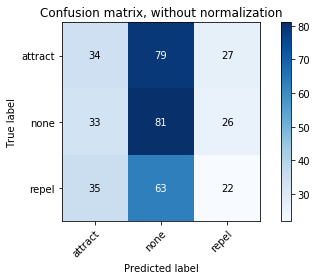

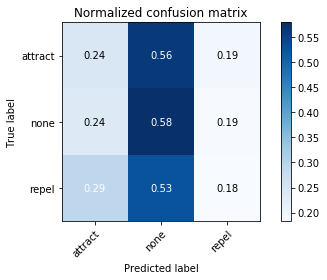

In [24]:
plot_confusion_matrix(Y, predicted, classes=FORCE_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y, predicted, classes=FORCE_CLASS_COLS, normalize=True)